This is one part of NLP text classification project, which is about the area of Indian Laws; the main goal of this part of the project is to do topic modeling based on some selected area of laws.  
In this demo I've used the `Criminal Laws` as the example, to show how this code works and how it presents the results in the end.

In [22]:
import pandas as pd
import string 
import nltk
import re 
import numpy as np
import warnings

pd.options.display.max_rows = 10

Have a look on what are the labels:

In [23]:
mapping = pd.read_csv('data/Interview_Mapping.csv')
mapping['Area.of.Law'].unique()

array(['To be Tested', 'Criminal Laws', 'Property Laws',
       'Criminal Procedure', 'Limitation', 'Company Law',
       'Civil Procedure', 'Succession Laws', 'Local Government',
       'Alternative Dispute Resolution', 'Constitution', 'Income Tax',
       'Tenancy Laws', 'Evidence', 'Sales Tax And Vat', 'Service Law',
       'Customs', 'Administrative Law', 'Civil Laws', 'Arbitration',
       'Employment And Labour Law', 'Banking And Finance',
       'Intellectual Property Laws', 'Registration', 'Family Law',
       'Government Contracts', 'Contempt Of Court', 'Election Laws',
       'Transport Law', 'Contract', 'Legal Profession',
       'Media And Telecommunication Laws', 'Insurance Law',
       'Consumer Law', 'Education', 'Partnership And Joint Ventures',
       'Excise', 'Cooperative Societies', 'Motor Vehicles',
       'Negotiable Instruments', 'Armed Forces',
       'Natural Resources And Energy'], dtype=object)

Now we have all the labels handy, now we do the topic modeling on the area we are interested.

In [24]:
# create labels
unlabeled = []

def pick_topic(topic):
    for index,row in mapping.iterrows():
        if row['Area.of.Law'] == topic:
            unlabeled.append(row['Judgements'])


In [25]:
#pick_topic('Tenancy Laws')
pick_topic('Criminal Laws')

In [26]:
#load files
import os
unlabeled_text=[]
for name in unlabeled:
    path = os.path.join('data/',name+'.txt')
    with open(path,'r',errors = 'ignore') as f:
        unlabeled_text.append(f.read())

## Topic Modeling

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import lexnlp.extract.en 
import lexnlp.nlp.en.tokens
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
stopwords = lexnlp.nlp.en.tokens.STOPWORDS
punct = string.punctuation

In [29]:
stopwords

{1068,
 1512,
 1522,
 1604,
 1660,
 1661,
 1947,
 2227,
 2252,
 3334,
 363,
 368,
 378,
 380,
 4136,
 414,
 444,
 454,
 457,
 458,
 465,
 466,
 482,
 485,
 492,
 516,
 519,
 5195,
 535,
 597,
 671,
 696,
 756,
 822,
 958,
 981,
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'case',
 'couldn',
 "couldn't",
 'court',
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'given',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'made'

In [41]:
# edit the stopword on top of lex's version
add_stop = ['case','plaintiff','petitioner','court','suit','given','made','said','also','one','two','first','act']

for item in add_stop:
    stopwords.add(item)

In [31]:
# data preprocessing
cleaned = []
for passage in unlabeled_text:
        
    # remove links 
    passage= re.sub(r'http(s)?:\/\/\S*', "", str(passage))
    # remove \n
    passage = ''.join([elem.replace('\n',' ') for elem in passage])
    # normalization and remove stopwords
    passage = ' '.join([elem for elem in passage.lower().split() if elem not in stopwords])
    #remove punctuation 
    passage = ''.join([elem.replace('[^\w\s]',' ') for elem in passage if elem not in punct])
    #remove digits
    passage = ''.join([elem for elem in passage if not elem.isdigit()])
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    passage = ' '.join(lemmatizer.lemmatize(elem) for elem in passage.split())
    cleaned.append(passage)
    # it has to be a string so it could be processed later 

<>:12: DeprecationWarning: invalid escape sequence \w
<>:12: DeprecationWarning: invalid escape sequence \w
<>:12: DeprecationWarning: invalid escape sequence \w
<ipython-input-31-6d6252e12d71>:12: DeprecationWarning: invalid escape sequence \w
  passage = ''.join([elem.replace('[^\w\s]',' ') for elem in passage if elem not in punct])


In [32]:
vect=CountVectorizer(ngram_range=(1,1),stop_words=stopwords)
dtm=vect.fit_transform(cleaned)
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,ab,aback,abandon,abdomen,abdominal,abduct,abducted,abducting,abduction,abdul,...,yield,young,younger,youngest,youth,yuva,yuvak,zafar,zeal,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
lda=LatentDirichletAllocation(n_components=5)
lda.fit_transform(dtm)

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


array([[3.76601852e-04, 3.74152129e-04, 3.77135447e-04, 5.14334354e-01,
        4.84537757e-01],
       [4.18039215e-04, 4.16119222e-04, 4.21482937e-04, 4.19260119e-04,
        9.98325099e-01],
       [3.92133249e-04, 3.91482405e-04, 3.97940199e-04, 2.91425017e-02,
        9.69675942e-01],
       [8.82121734e-05, 8.78557503e-05, 8.79560627e-05, 8.88139023e-05,
        9.99647162e-01],
       [4.37218497e-04, 4.37254398e-04, 4.38706584e-04, 4.38259940e-04,
        9.98248561e-01],
       [7.15381729e-05, 7.12508880e-05, 7.14317607e-05, 7.17044080e-05,
        9.99714075e-01],
       [1.63910765e-04, 1.63113399e-04, 1.63686777e-04, 1.64279297e-04,
        9.99345010e-01],
       [9.41207195e-05, 9.36132267e-05, 9.44241700e-05, 9.45506897e-05,
        9.99623291e-01],
       [7.39569499e-05, 7.36202675e-05, 7.38102067e-05, 9.99703661e-01,
        7.49518845e-05],
       [4.36980596e-01, 1.03097791e-04, 1.03482666e-04, 1.04429431e-04,
        5.62708394e-01],
       [8.08973833e-04, 8.0437

In [34]:
# fit and transform again
lda_dtf=lda.fit_transform(dtm)

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [35]:
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [36]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
pw            bail          section       obscene       child         
deceased      section       evidence      magazine      tea           
appellant     accused       appellant     section       defendant     
evidence      ground        learned       reader        stalk         
house         act           accused       particular    pump          
shri          offence       offence       matter        accident      
tentul        also          also          portion       leaf          
statement     reasonable    prosecution   publication   room          
chakravarty   wife          code          ordinary      negligence    
two           defendant     judge         scientific    foreign       




### Visualization of the topics

The package `PyldaVis`  is used for the topics visualization.  
In this graph, it certainly shows how distincs are the topics in this area of law, `Criminal Laws`. The fatther the circles away from each other, the more differences are the topics.


In [37]:
from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [43]:
viz = pyLDAvis.sklearn.prepare(lda,dtm,vect)
pyLDAvis.display(viz)

## WordCloud

In the end of this section, I used `wordcloud` to overview all the legal documents under the `criminal Laws`, and shows the most reccurent terms from the documents, which would be considered as the highlights of this particular area of law.

In [39]:
%pylab
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


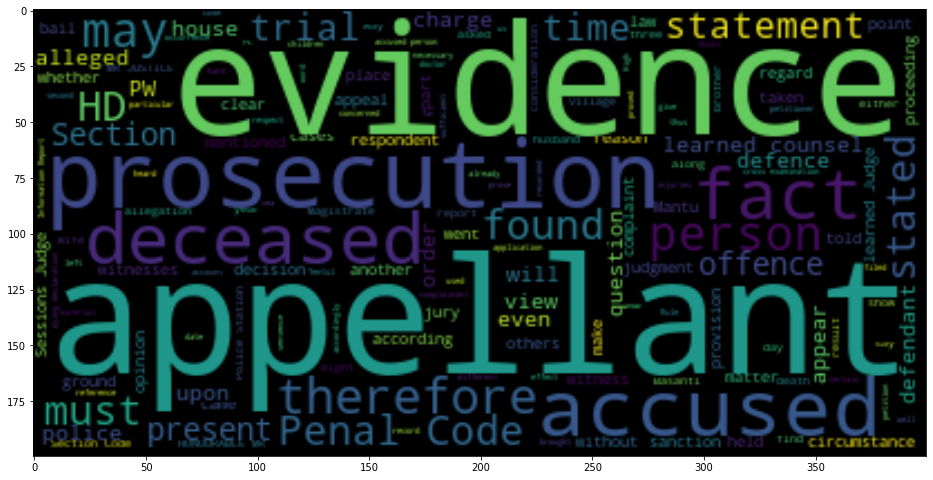

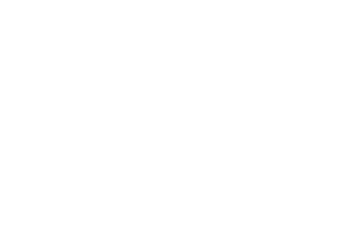

In [42]:
#d = path.dirname(__name__)

#alice_mask = np.array(Image.open(path.join(d, "Nigeria.png")))
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)
wc.generate(str(unlabeled_text))
wc.to_file('figure/wordcloud.png')
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
plt.figure()
#plt.imshow(cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

